In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pyro

## Bernoulli bandit
There is $I$ items. Each item has a probability of being clicked.  
You interact with the environment by sending an action in the step() function.

In [2]:
class SimpleBandit():
    def __init__(self, I = 10):
        self.I = I
        self.click_prob = np.random.rand(I)
    def step(self, action = None):
        p = self.click_prob[action]
        return (torch.rand((1,1)) <= p).float()

# Case 1: No knowledge of user
Let us build a high dimensional complex environment:

In [3]:
#env = ClickProbEnv(U = 50, I = 100, d = 3)
env = SimpleBandit(I = 20)
steps = 100 # number of steps in each game
evals = 100 # During evaluation, how many times should we evaluate the bandit?

#### Convergence by choosing each item many times

If you execute each action many times they will converge.

E.g. for the first ten arms:

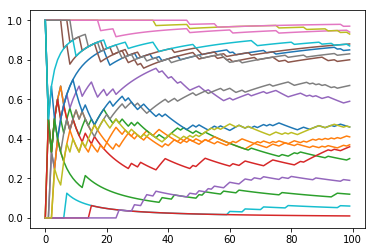

In [4]:
for i in range(env.I):
    reward = torch.cat([env.step(i) for _ in range(steps)])
    phat = reward.cumsum(0).view(-1)/torch.arange(1,steps+1).float()
    plt.plot(phat.numpy())

## Epsilon greedy
we let the bernoulli-agent do an epsilon greedy search with different epsilon parameters

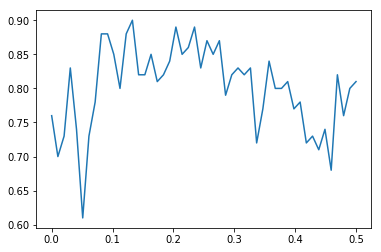

In [6]:
rewards, actions = np.ones(env.I)*0.0, np.ones(env.I)*1
eps = np.linspace(0,0.5,50)
avg_reward = np.zeros(len(eps))
for t, ep in enumerate(eps):
    r = np.zeros(steps)
    for i in range(steps):
        # sample a user (but dont show it to the algorithm)

        # Select action:
        if np.random.rand() > ep:
            action = np.argmax(rewards/actions)
        else:
            action = np.random.randint(env.I)
        r[i] = env.step(action)


        # update algorithm
        rewards[action] += r[i]
        actions[action] += 1

    #print("epsilon: {}, Avg rewards: {}".format(ep, r.sum()/steps))
    avg_reward[t] = r.sum()/steps
phat = r.cumsum(0)/torch.arange(1,steps+1).float()
plt.plot(eps, avg_reward)


#### Performance of best epsilon

Average reward over 100 runs: 0.7051000000000001. stddev: 0.07135117378151533


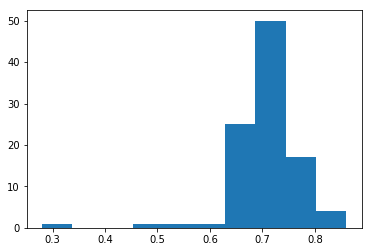

In [7]:
ep = 0.05
avg_reward = np.zeros(evals)
for t, _ in enumerate(avg_reward):
    rewards, actions = np.ones(env.I)*0.0, np.ones(env.I)*1
    r = np.zeros(steps)
    for i in range(steps):

        # Select action:
        if np.random.rand() > ep:
            action = np.argmax(rewards/actions)
        else:
            action = np.random.randint(env.I)
        r[i] = env.step(action)


        # update algorithm
        rewards[action] += r[i]
        actions[action] += 1

    #print("epsilon: {}, Avg rewards: {}".format(ep, r.sum()/steps))
    avg_reward[t] = r.sum()/steps
print("Average reward over {} runs: {}. stddev: {}".format(len(avg_reward), avg_reward.mean(), avg_reward.std()))
_ = plt.hist(avg_reward)

### Greedy Beta Bernoulli Bandit

Average reward over 100 runs: 0.7295999974012375. stddev: 0.07443009864633716


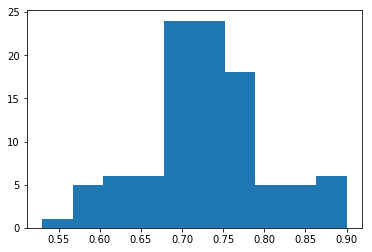

In [8]:
avg_reward = np.zeros(evals)
for t in range(evals):
    alpha, beta = torch.ones(env.I), torch.ones(env.I) #uniform prior
    r = torch.zeros(steps)
    for i in range(steps):
        
        # Select action
        action_values = alpha/(alpha+beta)
        action = action_values.argmax()
        r[i] = env.step(action)

        # update algorithm
        alpha[action] += r[i]
        beta[action] += 1-r[i]

    #print("epsilon: {}, Avg rewards: {}".format(ep, r.sum()/steps))
    avg_reward[t] = r.sum()/steps
print("Average reward over {} runs: {}. stddev: {}".format(len(avg_reward), avg_reward.mean(), avg_reward.std()))
_ = plt.hist(avg_reward)

Average reward over 100 runs: 0.007799999713897705. stddev: 0.07760901724763451


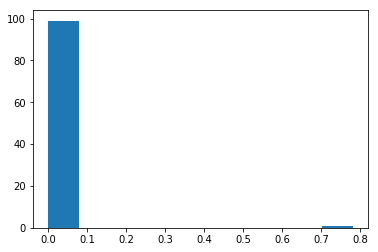

In [14]:
avg_reward = np.zeros(evals)
for t in range(1):
    alpha, beta = torch.ones(env.I), torch.ones(env.I) #uniform prior
    r = torch.zeros(steps)
    for i in range(steps):
        
        # Select action
        action_values = alpha/(alpha+beta)
        action = action_values.argmax()
        r[i] = env.step(action)

        # update algorithm
        alpha[action] += r[i]
        beta[action] += 1-r[i]
        
        #if i%30 == 0:
        #    plot_distribution(alpha, beta)

    #print("epsilon: {}, Avg rewards: {}".format(ep, r.sum()/steps))
    avg_reward[t] = r.sum()/steps
print("Average reward over {} runs: {}. stddev: {}".format(len(avg_reward), avg_reward.mean(), avg_reward.std()))
_ = plt.hist(avg_reward)

### Thompson Sampling in Beta Bernoulli: Uniform prior

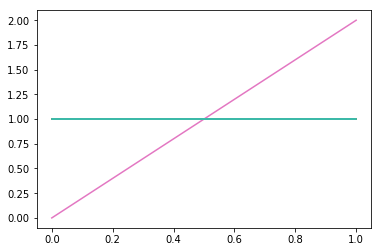

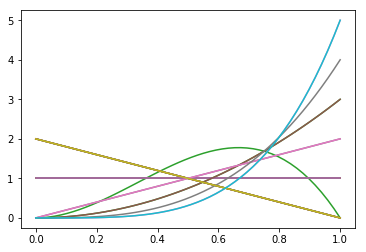

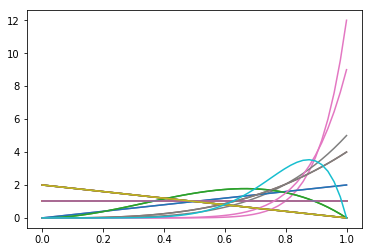

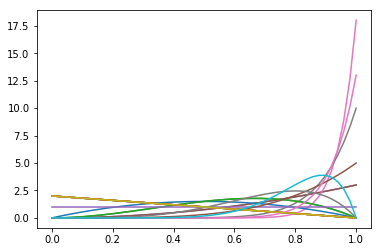

In [16]:
alpha, beta = torch.ones(env.I), torch.ones(env.I) 
r = torch.zeros(steps)
for i in range(steps):        
    # Select action
    action_values = scipy.stats.distributions.beta.rvs(alpha,beta)
    action = action_values.argmax()
    r[i] = env.step(action)

    # update algorithm
    alpha[action] += r[i]
    beta[action] += 1-r[i]
    if i%25 == 0:
        plot_distribution(alpha, beta)

Average reward over 100 runs: 0.7753999984264374. stddev: 0.037507862406920806


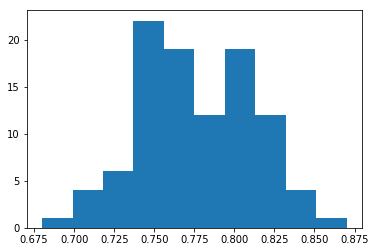

In [17]:
avg_reward = np.zeros(evals)
for t in range(evals):
    alpha, beta = torch.ones(env.I), torch.ones(env.I) 
    r = torch.zeros(steps)
    for i in range(steps):        
        # Select action
        action_values = scipy.stats.distributions.beta.rvs(alpha,beta)
        action = action_values.argmax()
        r[i] = env.step(action)

        # update algorithm
        alpha[action] += r[i]
        beta[action] += 1-r[i]

    avg_reward[t] = r.sum()/steps
print("Average reward over {} runs: {}. stddev: {}".format(len(avg_reward), avg_reward.mean(), avg_reward.std()))
_ = plt.hist(avg_reward)